In [ ]:
#Kullanılacak kütüphaneler çekildi.
import numpy as np
import random
import math
from matplotlib import pyplot as plt
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow as tf 


In [ ]:
#Veri çekilip hazırlanıyor
def prepare_data():
  (train_data, train_targets), (test_data, test_targets) = cifar10.load_data() #CIFAR10 veri kümesi çekildi, test ve eğitim olarak ayrıldı.
  in_dim = train_data.shape[1]*train_data.shape[2]*train_data.shape[3] #Giriş boyutu belirlendi.
  train_data = train_data.reshape(-1,in_dim).astype("float32") #Eğitim verisi vektör haline getirildi.
  test_data = test_data.reshape(-1,in_dim).astype("float32") #Test verisi vektör haline getirildi
  train_data = train_data / 255.0 #Eğitim verisi normalize edildi
  test_data = test_data / 255.0 #Test verisi normalize edildi
  train_targets = to_categorical(train_targets) #Eğitim verisinin sınıf bilgileri oluşturuldu.
  test_targets = to_categorical(test_targets) # Test verisinin sınıf bilgileri oluşturuldu.
  out_dim = train_targets.shape[1] #çıkış boyutu belirlendi
  return (train_data, train_targets), (test_data, test_targets), in_dim, out_dim

In [ ]:
(train_data, train_targets), (test_data, test_targets), in_dim, out_dim = prepare_data()

In [ ]:
#Model oluşturuluyor
def model(in_dim,out_dim):
  model = Sequential() #ardışık çalışan katmanlar
  model.add(Dense(1024,input_dim =in_dim, activation ="relu")) #1. Katman, aktivasyon fonksiyonu ve nöron sayısı verildi.
  model.add(Dropout(0.1)) #1. Katmana dropout özelliği eklendi. 
  model.add(Dense(1024,activation="relu")) #2. Katman, aktivasyon fonksiyonu ve nöron sayısı verildi.
  model.add(Dropout(0.1)) #2. Katmana dropout özelliği eklendi.
  model.add(Dense(1024,activation="relu")) #3. Katman, aktivasyon fonksiyonu ve nöron sayısı verildi.
  model.add(Dropout(0.1)) #3.. Katmana dropout özelliği eklendi.



  model.add(Dense(out_dim,activation ="softmax")) #Çıkış katmanı eklendi, aktivasyon fonksiyonu ve nöron sayısı belirlendi
  model.summary() #model özeti oluşturuldu.
  return model

In [ ]:
#Model çalıştırıldı.
model = model(in_dim,out_dim)

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_273 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dropout_218 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_274 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_219 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_275 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_220 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_276 (Dense)            (None, 10)              

In [ ]:
#Model eğitim için hazırlanıyor.
def train(model,train_data,train_targets):
  model.compile(loss= tf.keras.losses.kullback_leibler_divergence, optimizer=tf.keras.optimizers.SGD(learning_rate=0.005) ,metrics=['accuracy']) #loss fonksiyonu, algoritma, öğrenme hızı belirlendi.
  history = model.fit(train_data, train_targets,epochs = 10, verbose=2) #eğitim kümesini modele verildi, iterasyon sayısı belirlendi.
  return history


In [ ]:
#Test fonksiyonu oluşturuluyor.
def test(model,test_data,train_targets):
  a=model.evaluate(test_data,test_targets,verbose=2) #Model test verisi ile değerlendirildi
  print(a) #değerlendirme sonuçlarını bastırdı.

In [ ]:
history = train(model,train_data,train_targets) #model eğitime başladı

Epoch 1/10
1563/1563 - 4s - loss: 1.9376 - accuracy: 0.3035
Epoch 2/10
1563/1563 - 3s - loss: 1.7446 - accuracy: 0.3808
Epoch 3/10
1563/1563 - 3s - loss: 1.6610 - accuracy: 0.4105
Epoch 4/10
1563/1563 - 3s - loss: 1.6023 - accuracy: 0.4302
Epoch 5/10
1563/1563 - 3s - loss: 1.5553 - accuracy: 0.4494
Epoch 6/10
1563/1563 - 3s - loss: 1.5229 - accuracy: 0.4611
Epoch 7/10
1563/1563 - 3s - loss: 1.4873 - accuracy: 0.4737
Epoch 8/10
1563/1563 - 3s - loss: 1.4601 - accuracy: 0.4826
Epoch 9/10
1563/1563 - 3s - loss: 1.4314 - accuracy: 0.4910
Epoch 10/10
1563/1563 - 3s - loss: 1.4092 - accuracy: 0.5001


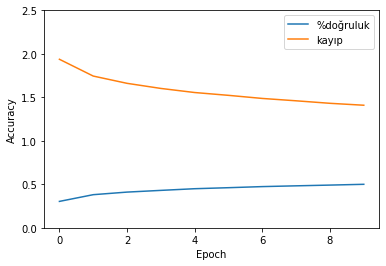

In [ ]:
plt.plot(history.history['accuracy'], label='%doğruluk') #doğruluk ve loss değişimleri çizdirildi.
plt.plot(history.history['loss'], label='kayıp')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 2.5])
plt.legend(loc='upper right')


In [ ]:
test(model,test_data,test_targets) #Test işlemi gerçekleşiyor.

313/313 - 0s - loss: 1.4236 - accuracy: 0.4819
[1.4236170053482056, 0.48190000653266907]


In [ ]:
def cm(test_targets,model): # Confussion matrix oluşturuluyor. 
  categories ={'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9} #sınıf bilgileri verildi
  cat_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] #sınıf bilgileri liste haline getirildi.
  y_pred = model.predict(test_data) 
  y_pred_num = y_pred.argmax(1)
  y_test_num = test_targets.argmax(1)
  cm = confusion_matrix(y_true=y_test_num, y_pred=y_pred_num)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cat_list) 
  disp.plot(xticks_rotation='horizontal') #matris bastırıldı.


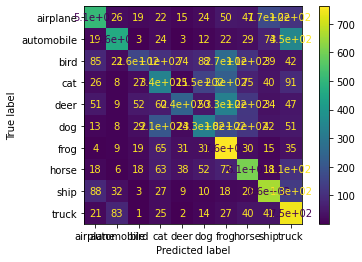

In [ ]:
cm(test_targets,model)